# Data Source

Data Source get with select :
```sql
-- Агрегирование затрат на кампанию по месяцам
select DATE_TRUNC('month', campaign_start_dtm_ts) AS month,  
	SUM(
		case 
			when currency = 'USD' then campaign_cost::numeric *96
			else campaign_cost::numeric
		end
	) AS total_cost_rub,
	campaign_type, 
	source_medium,
	count(user_id) user_id_cnt
FROM adv_data
GROUP by  DATE_TRUNC('month', campaign_start_dtm_ts), campaign_type, source_medium
ORDER BY month, campaign_type
;
```



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Загрузка данных из CSV файла
df = pd.read_csv('adv_data_aggregation_202405282030.csv', delimiter=';')

# Преобразование столбца 'month' в datetime формат
df['month'] = pd.to_datetime(df['month'])
# Разделение столбца 'source_medium' на два столбца 'source' и 'medium'
df[['source', 'medium']] = df['source_medium'].str.split(' / ', expand=True)
print(df.head())

In [8]:
# Просмотр первых нескольких строк данных
print(df.head())

       month  total_cost_rub campaign_type             source_medium  \
0 2022-10-01          197.86         click      android / mobile_app   
1 2022-10-01          187.63         click            bing / organic   
2 2022-10-01            0.00         click             email / email   
3 2022-10-01          218.66         click  finance.rambler.ru / cpm   
4 2022-10-01          635.54         click          google / organic   

   user_id_cnt              source      medium  
0            3             android  mobile_app  
1            2                bing     organic  
2            1               email       email  
3            1  finance.rambler.ru         cpm  
4            9              google     organic  


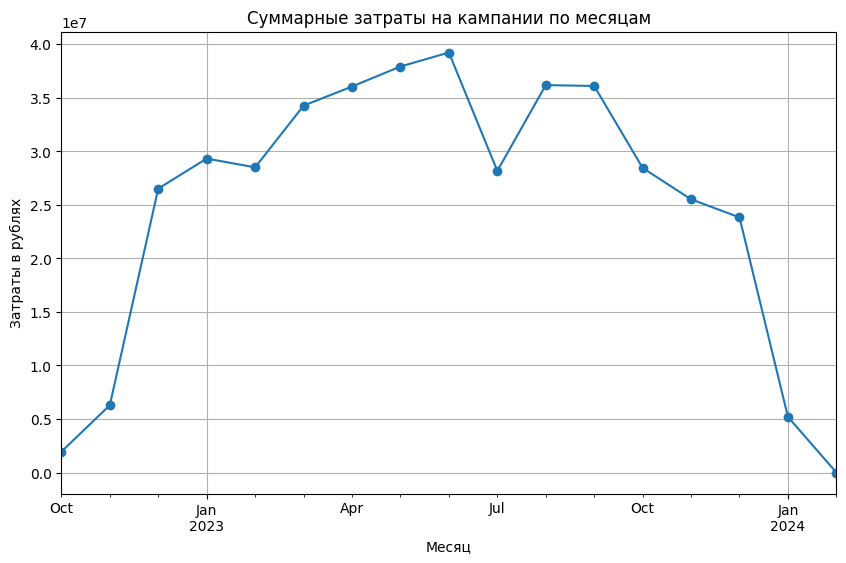

In [10]:
# Группировка данных по месяцам и суммирование затрат
monthly_costs = df.groupby('month')['total_cost_rub'].sum()
# Построение графика суммарных затрат по месяцам
plt.figure(figsize=(10, 6))
monthly_costs.plot(kind='line', marker='o')
plt.title('Суммарные затраты на кампании по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Затраты в рублях')
plt.grid(True)
plt.show()


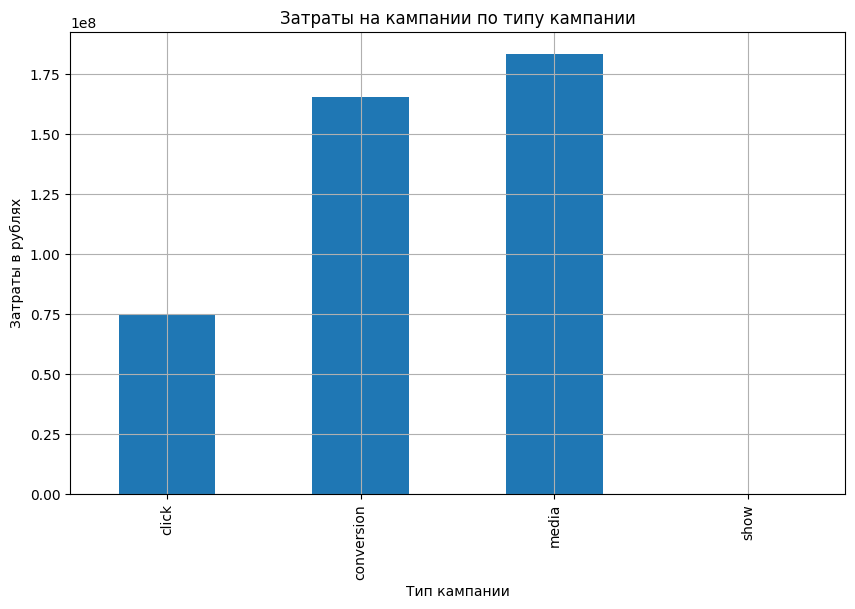

In [11]:
# Группировка данных по типу кампании и суммирование затрат
campaign_costs = df.groupby('campaign_type')['total_cost_rub'].sum()

# Построение графика затрат по типу кампании
plt.figure(figsize=(10, 6))
campaign_costs.plot(kind='bar')
plt.title('Затраты на кампании по типу кампании')
plt.xlabel('Тип кампании')
plt.ylabel('Затраты в рублях')
plt.grid(True)
plt.show()

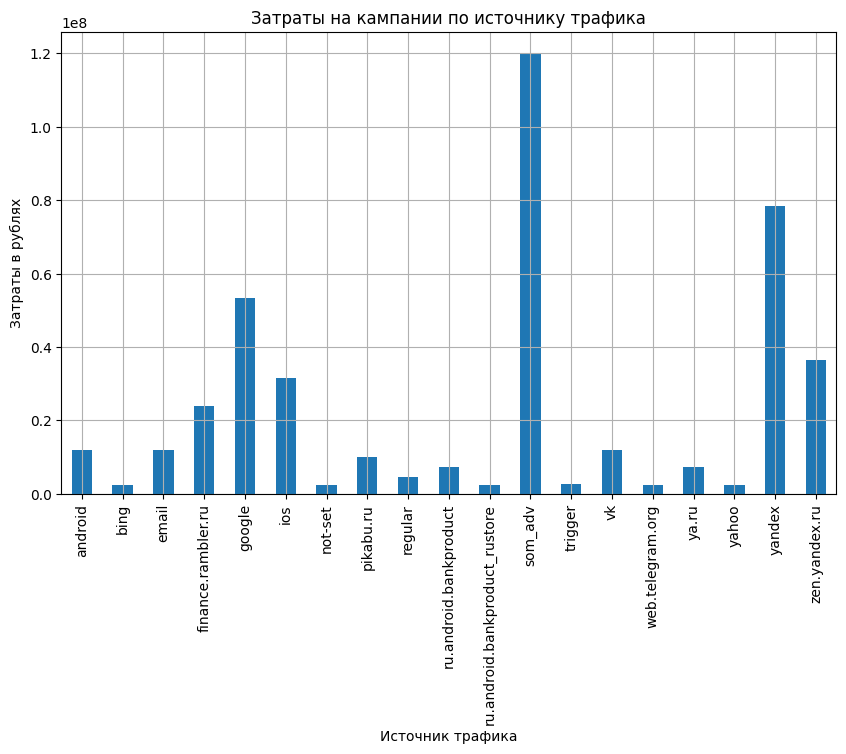

In [12]:
# Группировка данных по источнику трафика и суммирование затрат
source_costs = df.groupby('source')['total_cost_rub'].sum()

# Построение графика затрат по источнику трафика
plt.figure(figsize=(10, 6))
source_costs.plot(kind='bar')
plt.title('Затраты на кампании по источнику трафика')
plt.xlabel('Источник трафика')
plt.ylabel('Затраты в рублях')
plt.grid(True)
plt.show()

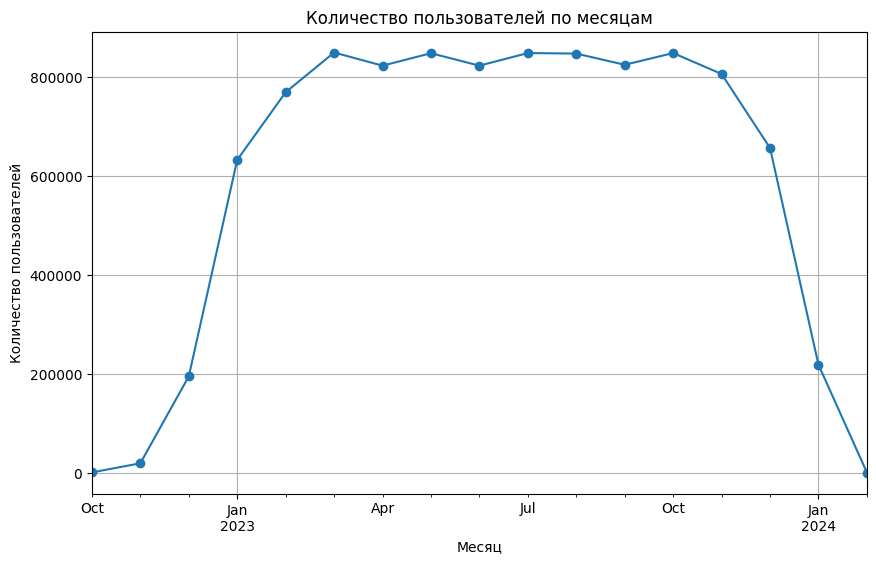

In [14]:
# Группировка данных по месяцам и суммирование уникальных пользователей
monthly_users = df.groupby('month')['user_id_cnt'].sum()

# Построение графика количества пользователей по месяцам
plt.figure(figsize=(10, 6))
monthly_users.plot(kind='line', marker='o')
plt.title('Количество пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()